<a href="https://colab.research.google.com/github/clustering-jun/GNU-MachineLearning/blob/main/L11-2_%EB%AA%A8%EB%8D%B8_%EC%84%A0%ED%83%9D%EA%B3%BC_%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0_%EC%B5%9C%EC%A0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **하이퍼파라미터 값의 영향 시각화하기**

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier

digits = datasets.load_digits()
features = digits.data
target = digits.target

param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                             features,
                                             target,
                                             param_name="n_estimators",
                                             param_range=param_range,
                                             cv=5,
                                             scoring="accuracy",
                                             n_jobs=-1)

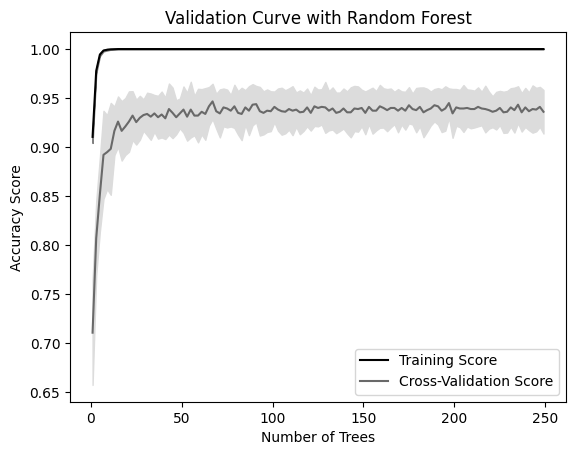

In [26]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training Score", color="black")
plt.plot(param_range, test_mean, label="Cross-Validation Score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title("Validation Curve with Random Forest")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()


### **그리드 서치를  사용하여 최선의 모델 선택하기**

In [27]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()
features = iris.data
target = iris.target

model = LogisticRegression()
params = {"C": np.logspace(0, 4, 10),
          "penalty": ["l1", "l2"]}

grid_search = GridSearchCV(model, params, cv=5, verbose=0)
grid_search.fit(features, target)

grid_search.best_params_

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': np.float64(7.742636826811269), 'penalty': 'l2'}

### **랜덤 서치를 사용하여 최선의 모델 선택하기**

In [28]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

iris = datasets.load_iris()
features = iris.data
target = iris.target

model = LogisticRegression()
params = {"C": np.logspace(0, 4, 10),
          "penalty": ["l1", "l2"]}

random_search = RandomizedSearchCV(model, params, n_iter=10, cv=5, verbose=0, n_jobs=-1, random_state=0)
random_search.fit(features, target)

random_search.best_params_

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

{'penalty': 'l2', 'C': np.float64(1.0)}

### **여러 학습 알고리즘에서 최선의 모델 선택하기**

In [29]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

np.random.seed(0)

iris = datasets.load_iris()
features = iris.data
target = iris.target

pipe = Pipeline([("classifier", RandomForestClassifier())])

search_space = [
    {"classifier": [LogisticRegression()],
     "classifier__penalty": ["l1", "l2"],
     "classifier__C": np.logspace(0, 4, 10)},
    {"classifier": [RandomForestClassifier()],
     "classifier__n_estimators": [10, 100, 1000],
     "classifier__max_features": [1, 2, 3]}
]

grid_search = GridSearchCV(pipe, search_space, cv=5, verbose=0)
grid_search.fit(features, target)

grid_search.best_params_

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'classifier': LogisticRegression(),
 'classifier__C': np.float64(7.742636826811269),
 'classifier__penalty': 'l2'}

In [33]:
pipe = Pipeline([("classifier", RandomForestClassifier())])

search_space = [
    {"classifier": [LogisticRegression()],
     "classifier__penalty": ["l1", "l2"],
     "classifier__C": np.logspace(0, 4, 10)},
    {"classifier": [RandomForestClassifier()],
     "classifier__n_estimators": [10, 100, 1000],
     "classifier__max_features": [1, 2, 3]}
]

### **연습 문제**
- 아래의 코드를 참고하여 사용할 수 있는 학습 모델을 모두 사용하여 Survived에 대해 예측하는 최적의 학습 모델과 그 하이퍼파라미터를 찾으시오.

In [31]:
import pandas as pd

titanic = pd.read_csv('titanic.csv')
titanic = titanic.dropna()

features = titanic[['Pclass', 'Sex', 'Age', 'Fare']]
target = titanic['Survived']

Sex_mapping = {'male': 0, 'female':1}
features['Sex'] = features['Sex'].replace(Sex_mapping)

/tmp/ipython-input-3465484389.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features['Sex'] = features['Sex'].replace(Sex_mapping)
/tmp/ipython-input-3465484389.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Sex'] = features['Sex'].replace(Sex_mapping)


In [35]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

np.random.seed(0)

pipe = Pipeline([("classifier", RandomForestClassifier())])

search_space = [
    {"classifier": [LogisticRegression()],
     "classifier__penalty": ["l1", "l2"],
     "classifier__C": np.logspace(0, 4, 10)},
    {"classifier": [RandomForestClassifier()],
     "classifier__n_estimators": [10, 100, 1000],
     "classifier__max_features": [1, 2, 3]}
]

grid_search = GridSearchCV(pipe, search_space, cv=5, verbose=0)
grid_search.fit(features, target)

grid_search.best_params_

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 145.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l

{'classifier': RandomForestClassifier(),
 'classifier__max_features': 2,
 'classifier__n_estimators': 10}

- 최적의 학습 모델: `Random Forest Classifier`
- 그 하이퍼파라미터: `max_features = 2`, `n_estimators = 10`